In [76]:
import numpy as np
import modeling as mod
from sklearn.externals import joblib
import matplotlib.pyplot as plt

train_features = ['code/files', 'comment/code', 'test/code', 'readme/code',
                  'docstring/code', 'E1/code', 'E2/code', 'E3/code',
                  'E4/code', 'E5/code', 'E7/code', 'W1/code', 'W2/code',
                  'W3/code', 'W6/code']

labels = ['positive class positives', 'positive class negatives',
         'background class negatives', 'background class positives']

In [5]:
# directory info
good_dir = 'repo_data/top_stars_stats_Python.txt'
bad_dir = 'repo_data/bottom_stars_stats_Python.txt'

# prepare data
X_s, Xb_s, X, Xb = mod.prepare_data(good_dir, bad_dir)

/Users/arisilburt/Insight/git-inspired/modeling.py:58: RuntimeWarning: divide by zero encountered in log10
  X = np.log10(df_good[train_features])
/Users/arisilburt/Insight/git-inspired/modeling.py:59: RuntimeWarning: divide by zero encountered in log10
  Xb = np.log10(df_bad[train_features])


In [6]:
scaler_name = 'models/scaler.pkl'
minvals_name = 'models/minvals.pkl'
model_name = 'models/OC-SVM.pkl'
scaler = joblib.load(scaler_name)
minvals = joblib.load(minvals_name)
model = joblib.load(model_name)

In [46]:
y_X = model.predict(X_s)
y_Xb = model.predict(Xb_s)

# unscaled
X_pos = X[y_X == 1].values
X_neg = X[y_X == -1].values
Xb_pos = Xb[y_Xb == 1].values
Xb_neg = Xb[y_Xb == -1].values

# PCA projections of each class

In [61]:
X_PC, Xb_PC = mod.get_PCs(X_s, Xb_s)

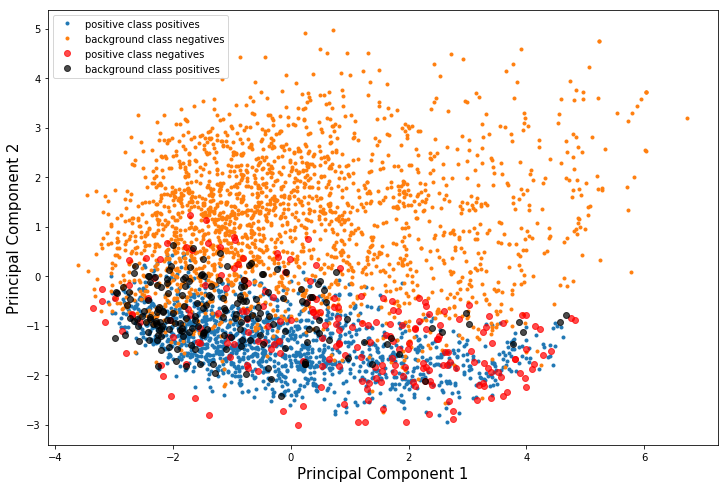

In [88]:
plt.figure(figsize=(12,8))
plt.plot(X_PC[y_X == 1, 0], X_PC[y_X == 1, 1], '.', label=labels[0])
plt.plot(Xb_PC[y_Xb == -1, 0], Xb_PC[y_Xb == -1, 1], '.', label=labels[2])
plt.plot(X_PC[y_X == -1, 0], X_PC[y_X == -1, 1], 'o', color='red', label=labels[1], alpha=0.7)
plt.plot(Xb_PC[y_Xb == 1, 0], Xb_PC[y_Xb == 1, 1], 'o', color='black', label=labels[3], alpha=0.7)
plt.legend()
plt.xlabel('Principal Component 1', fontsize=15)
plt.ylabel('Principal Component 2', fontsize=15)
plt.savefig('images/classifications_PC.png')

# Plot Histogram per feature

In [77]:
i=0

for i in range(15):
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

    counts, bins, _ = ax1.hist(X_pos[:, i], label=labels[0])
    _, _, _ = ax1.hist(X_neg[:, i], bins=bins, alpha=0.7, label=labels[1])
    ax1.set_xlabel(train_features[i], fontsize=15)
    ax1.legend()

    counts, bins, _ = ax2.hist(Xb_neg[:, i], color='green', label=labels[2])
    _, _, _ = ax2.hist(Xb_pos[:, i], bins=bins, alpha=0.7, color='red', label=labels[3])
    ax2.set_xlabel(train_features[i], fontsize=15)
    ax2.legend()

    plt.savefig('images/%s_outliers.png'%(train_features[i].replace('/', '_')))
    plt.close()